In [8]:
import json
import pandas as pd
import numpy as np

In [10]:
with open("/python-workdir/VQA_ReGAT/data/gqa/sceneGraphs/train_sceneGraphs.json", "r") as train_scenegraphs:
    data = train_scenegraphs.read()
    train_sg_json = json.loads(data)

In [11]:
print (train_sg_json['2386621']['width'])
print (train_sg_json['2386621']['height'])
print (train_sg_json['2386621']['objects'])

500
375
{'681267': {'name': 'banana', 'h': 34, 'relations': [{'object': '681262', 'name': 'to the left of'}], 'w': 64, 'attributes': ['small', 'yellow'], 'y': 55, 'x': 248}, '681265': {'name': 'spots', 'h': 16, 'relations': [], 'w': 26, 'attributes': [], 'y': 92, 'x': 245}, '681264': {'name': 'bananas', 'h': 50, 'relations': [{'object': '681259', 'name': 'to the left of'}], 'w': 49, 'attributes': ['small', 'yellow'], 'y': 32, 'x': 268}, '681263': {'name': 'picnic', 'h': 374, 'relations': [], 'w': 499, 'attributes': ['delicious'], 'y': 0, 'x': 0}, '681262': {'name': 'straw', 'h': 95, 'relations': [{'object': '681268', 'name': 'to the right of'}, {'object': '681267', 'name': 'to the right of'}, {'object': '681253', 'name': 'to the right of'}], 'w': 15, 'attributes': ['white', 'plastic'], 'y': 55, 'x': 402}, '681261': {'name': 'meat', 'h': 27, 'relations': [{'object': '681255', 'name': 'on'}, {'object': '681255', 'name': 'inside'}], 'w': 24, 'attributes': ['small', 'brown', 'delicious'], 

In [18]:
print (train_sg_json['2386621']['objects'].keys())

dict_keys(['681267', '681265', '681264', '681263', '681262', '681261', '681260', '681269', '681268', '681258', '681259', '681256', '681257', '681254', '681255', '681253'])


In [19]:
for key in train_sg_json['2386621']['objects'].keys():
    print (str(key)+ " " + str(train_sg_json['2386621']['objects'][key]))

681267 {'name': 'banana', 'h': 34, 'relations': [{'object': '681262', 'name': 'to the left of'}], 'w': 64, 'attributes': ['small', 'yellow'], 'y': 55, 'x': 248}
681265 {'name': 'spots', 'h': 16, 'relations': [], 'w': 26, 'attributes': [], 'y': 92, 'x': 245}
681264 {'name': 'bananas', 'h': 50, 'relations': [{'object': '681259', 'name': 'to the left of'}], 'w': 49, 'attributes': ['small', 'yellow'], 'y': 32, 'x': 268}
681263 {'name': 'picnic', 'h': 374, 'relations': [], 'w': 499, 'attributes': ['delicious'], 'y': 0, 'x': 0}
681262 {'name': 'straw', 'h': 95, 'relations': [{'object': '681268', 'name': 'to the right of'}, {'object': '681267', 'name': 'to the right of'}, {'object': '681253', 'name': 'to the right of'}], 'w': 15, 'attributes': ['white', 'plastic'], 'y': 55, 'x': 402}
681261 {'name': 'meat', 'h': 27, 'relations': [{'object': '681255', 'name': 'on'}, {'object': '681255', 'name': 'inside'}], 'w': 24, 'attributes': ['small', 'brown', 'delicious'], 'y': 123, 'x': 68}
681260 {'name

In [20]:
train_sg_list = []
for image_key in train_sg_json.keys():    
    train_sg_dict = {}
    train_sg_dict['tsg_key'] = image_key
    train_sg_dict['image_width'] = train_sg_json[image_key]['width']
    train_sg_dict['image_height'] = train_sg_json[image_key]['height']
    train_sg_list.append(train_sg_dict)

train_scenegraph_df = pd.DataFrame(train_sg_list)

In [21]:
train_scenegraph_df.head()

,tsg_key,image_width,image_height
0,2386621,500,375
1,2373554,500,281
2,2370799,500,333
3,2370791,500,333
4,2370790,500,318


In [22]:
train_scenegraph_df[(train_scenegraph_df['image_width'] > 500)]

,tsg_key,image_width,image_height
88,271,800,600
89,272,640,480
90,273,800,600
91,274,800,600
93,276,600,800
...,...,...,...
74819,1592116,1024,685
74820,1592117,1024,706
74821,1592110,1024,682
74824,1592113,1024,680


In [23]:
object_sg_list = []
for image_key in train_sg_json.keys():    
    for object_key in train_sg_json[image_key]['objects'].keys(): 
        object_sg_dict = {}
        object_sg_dict['tsg_key'] = image_key
        object_sg_dict['object_key'] = object_key
        object_sg_dict['name'] = train_sg_json[image_key]['objects'][object_key]['name']
        object_sg_dict['height'] = train_sg_json[image_key]['objects'][object_key]['h']
        object_sg_dict['width'] = train_sg_json[image_key]['objects'][object_key]['w']
        object_sg_dict['y_val'] = train_sg_json[image_key]['objects'][object_key]['y']
        object_sg_dict['x_val'] = train_sg_json[image_key]['objects'][object_key]['x']
        object_sg_dict['attributes'] = ','.join(train_sg_json[image_key]['objects'][object_key]['attributes'])
        object_sg_list.append(object_sg_dict)

object_scenegraph_df = pd.DataFrame(object_sg_list)

In [25]:
object_scenegraph_df.head()

,tsg_key,object_key,name,height,width,y_val,x_val,attributes
0,2386621,681267,banana,34,64,55,248,"small,yellow"
1,2386621,681265,spots,16,26,92,245,
2,2386621,681264,bananas,50,49,32,268,"small,yellow"
3,2386621,681263,picnic,374,499,0,0,delicious
4,2386621,681262,straw,95,15,55,402,"white,plastic"


In [26]:
object_relation_sg_list = []
for image_key in train_sg_json.keys():    
    for object_key in train_sg_json[image_key]['objects'].keys(): 
        for relation_dict in train_sg_json[image_key]['objects'][object_key]['relations']:
            object_relation_sg_dict = {}
            object_relation_sg_dict['tsg_key'] = image_key
            object_relation_sg_dict['object_key'] = object_key
            object_relation_sg_dict['relations_key'] = relation_dict['object']
            object_relation_sg_dict['name'] = relation_dict['name']
            object_relation_sg_list.append(object_relation_sg_dict)

object_relation_scenegraph_df = pd.DataFrame(object_relation_sg_list)

In [31]:
object_relation_scenegraph_df.head()

,tsg_key,object_key,relations_key,name
0,2386621,681267,681262,to the left of
1,2386621,681264,681259,to the left of
2,2386621,681262,681268,to the right of
3,2386621,681262,681267,to the right of
4,2386621,681262,681253,to the right of


In [32]:
train_object_scenegraph_df = pd.merge(train_scenegraph_df, object_scenegraph_df, on = 'tsg_key', how = 'left')

In [33]:
train_object_reation_scenegraph_df = pd.merge(train_object_scenegraph_df, object_relation_scenegraph_df, on = ['tsg_key', 'object_key'], how = 'left')

In [34]:
train_object_reation_scenegraph_df = train_object_reation_scenegraph_df.replace(np.nan, '', regex=True)

In [35]:
train_object_reation_scenegraph_df.head()

,tsg_key,image_width,image_height,object_key,name_x,height,width,y_val,x_val,attributes,relations_key,name_y
0,2386621,500,375,681267,banana,34,64,55,248,"small,yellow",681262,to the left of
1,2386621,500,375,681265,spots,16,26,92,245,,,
2,2386621,500,375,681264,bananas,50,49,32,268,"small,yellow",681259,to the left of
3,2386621,500,375,681263,picnic,374,499,0,0,delicious,,
4,2386621,500,375,681262,straw,95,15,55,402,"white,plastic",681268,to the right of


In [36]:
train_object_scenegraph_df[(train_object_scenegraph_df.image_width > 800)]

,tsg_key,image_width,image_height,object_key,name,height,width,y_val,x_val,attributes
3009,1592189,1024,768,3611350,shelf,9.0,126.0,126.0,50.0,
3010,1592189,1024,768,3611351,shelf,15.0,124.0,56.0,49.0,
6752,150336,1024,683,3794889,plates,80.0,135.0,427.0,359.0,
6753,150336,1024,683,3794891,glasses,35.0,63.0,311.0,625.0,
6754,150336,1024,683,3794890,girl,451.0,354.0,215.0,621.0,
...,...,...,...,...,...,...,...,...,...,...
1229783,1592113,1024,680,4432338,cell phone,43.0,41.0,353.0,145.0,
1229784,1592113,1024,680,4432283,platform,183.0,436.0,230.0,588.0,
1229785,1592113,1024,680,4432279,window,36.0,32.0,197.0,242.0,
1229786,1592113,1024,680,4432278,train,88.0,125.0,184.0,209.0,


In [20]:
import time
import sys
import os
import random
from skimage import io
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2

(375, 500, 3)


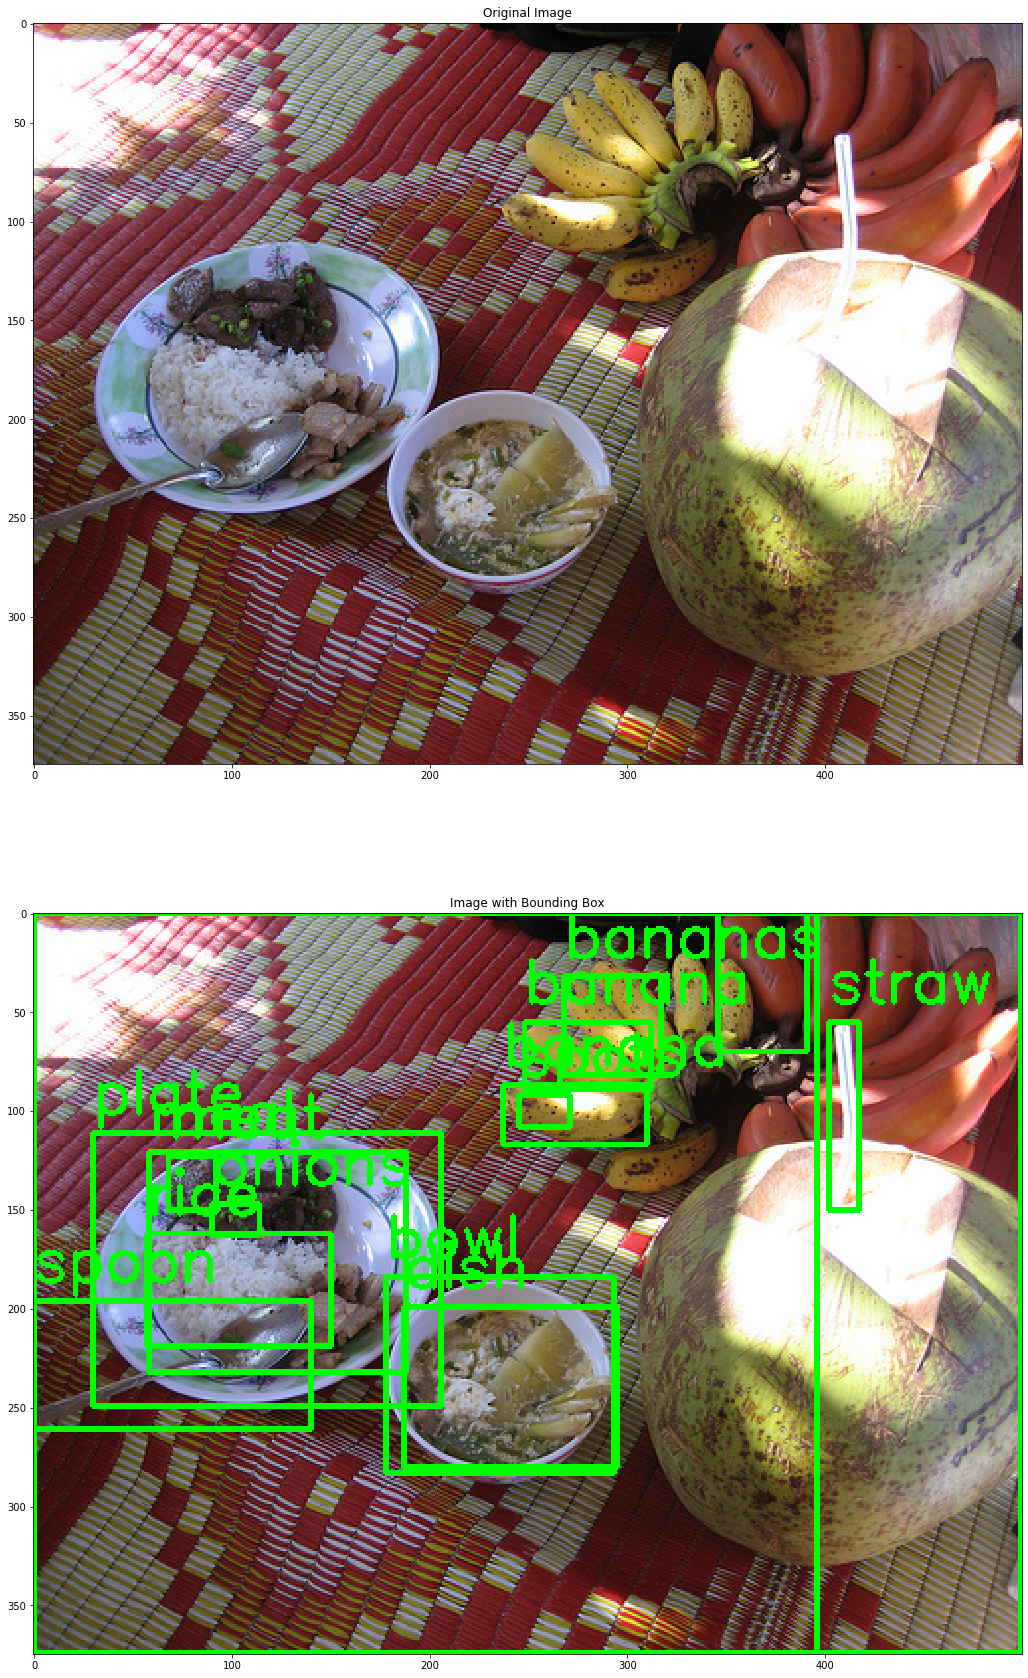

In [23]:
img_id = '2386621'
#2669
img = io.imread("./images/" + img_id + ".jpg")
height, width, _ = img.shape
print(img.shape)
img_bbox = img.copy()
temp_df = train_object_scenegraph_df[(train_object_scenegraph_df.tsg_key == img_id)]

for index, row in temp_df.iterrows():
    ymin = int(row['y_val'])
    ymax = int(row['y_val']) + int(row['height'])
    xmin = int(row['x_val'])
    xmax = int(row['x_val']) + int(row['width'])
    class_name = row['name']

    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)

plt.figure(figsize=(30,30))

plt.subplot(2,1,1)
plt.title('Original Image')
plt.imshow(img)
    
plt.subplot(2,1,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)

plt.show()

plt.clf()
plt.cla()
plt.close()

In [37]:
test_df = train_object_scenegraph_df[(train_object_scenegraph_df.tsg_key == img_id)].copy()

In [38]:
test_df['x0'] = test_df['x_val']
test_df['y0'] = test_df['y_val']
test_df['x1'] = test_df['x_val'] + test_df['width']
test_df['y1'] = test_df['y_val'] + test_df['height']
test_df

,tsg_key,image_width,image_height,object_key,name,height,width,y_val,x_val,attributes,x0,y0,x1,y1
0,2386621,500,375,681267,banana,34.0,64.0,55.0,248.0,"small,yellow",248.0,55.0,312.0,89.0
1,2386621,500,375,681265,spots,16.0,26.0,92.0,245.0,,245.0,92.0,271.0,108.0
2,2386621,500,375,681264,bananas,50.0,49.0,32.0,268.0,"small,yellow",268.0,32.0,317.0,82.0
3,2386621,500,375,681263,picnic,374.0,499.0,0.0,0.0,delicious,0.0,0.0,499.0,374.0
4,2386621,500,375,681262,straw,95.0,15.0,55.0,402.0,"white,plastic",402.0,55.0,417.0,150.0
5,2386621,500,375,681261,meat,27.0,24.0,123.0,68.0,"small,brown,delicious",68.0,123.0,92.0,150.0
6,2386621,500,375,681260,rice,57.0,93.0,162.0,57.0,"piled,white",57.0,162.0,150.0,219.0
7,2386621,500,375,681269,onions,16.0,24.0,147.0,90.0,green,90.0,147.0,114.0,163.0
8,2386621,500,375,681268,tablecloth,374.0,396.0,0.0,0.0,white,0.0,0.0,396.0,374.0
9,2386621,500,375,681258,bowl,99.0,115.0,184.0,178.0,full,178.0,184.0,293.0,283.0
